# 05 Line Linking

Ryan E Lima [](https://orcid.org/0000-0002-5352-7215)

In [7]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import geopandas as gpd
from shapely.ops import linemerge
import random
import numpy as np


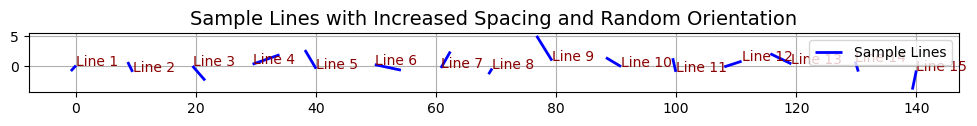

In [8]:
# Generate more lines with varying orientations and some intentional gaps
def generate_random_lines(num_lines, x_start=0, y_start=0, max_length=5, spacing=5):
    lines = []
    for i in range(num_lines):
        # Random starting point offset
        x0 = x_start + i * spacing + random.uniform(-1, 1)
        y0 = y_start + random.uniform(-1, 1)
        
        # Random orientation and length for the line
        angle = random.uniform(0, 2 * np.pi)
        length = random.uniform(1, max_length)
        x1 = x0 + length * np.cos(angle)
        y1 = y0 + length * np.sin(angle)
        
        lines.append(LineString([(x0, y0), (x1, y1)]))
    return lines

# Generate new lines with intentional gaps and varying orientations
new_lines = generate_random_lines(15, spacing=10)

# Combine with the previous lines
all_lines = gpd.GeoDataFrame(geometry=new_lines)

# Visualize the new set of lines with wider spacing and varied orientation
fig, ax = plt.subplots(figsize=(12, 8))
all_lines.plot(ax=ax, color='blue', linewidth=2, label="Sample Lines")

# Label each line
for idx, line in enumerate(all_lines.geometry):
    x, y = line.coords[0]  # Get the start of each line for labeling
    ax.text(x, y, f'Line {idx+1}', fontsize=10, color='darkred')

plt.title("Sample Lines with Increased Spacing and Random Orientation", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()